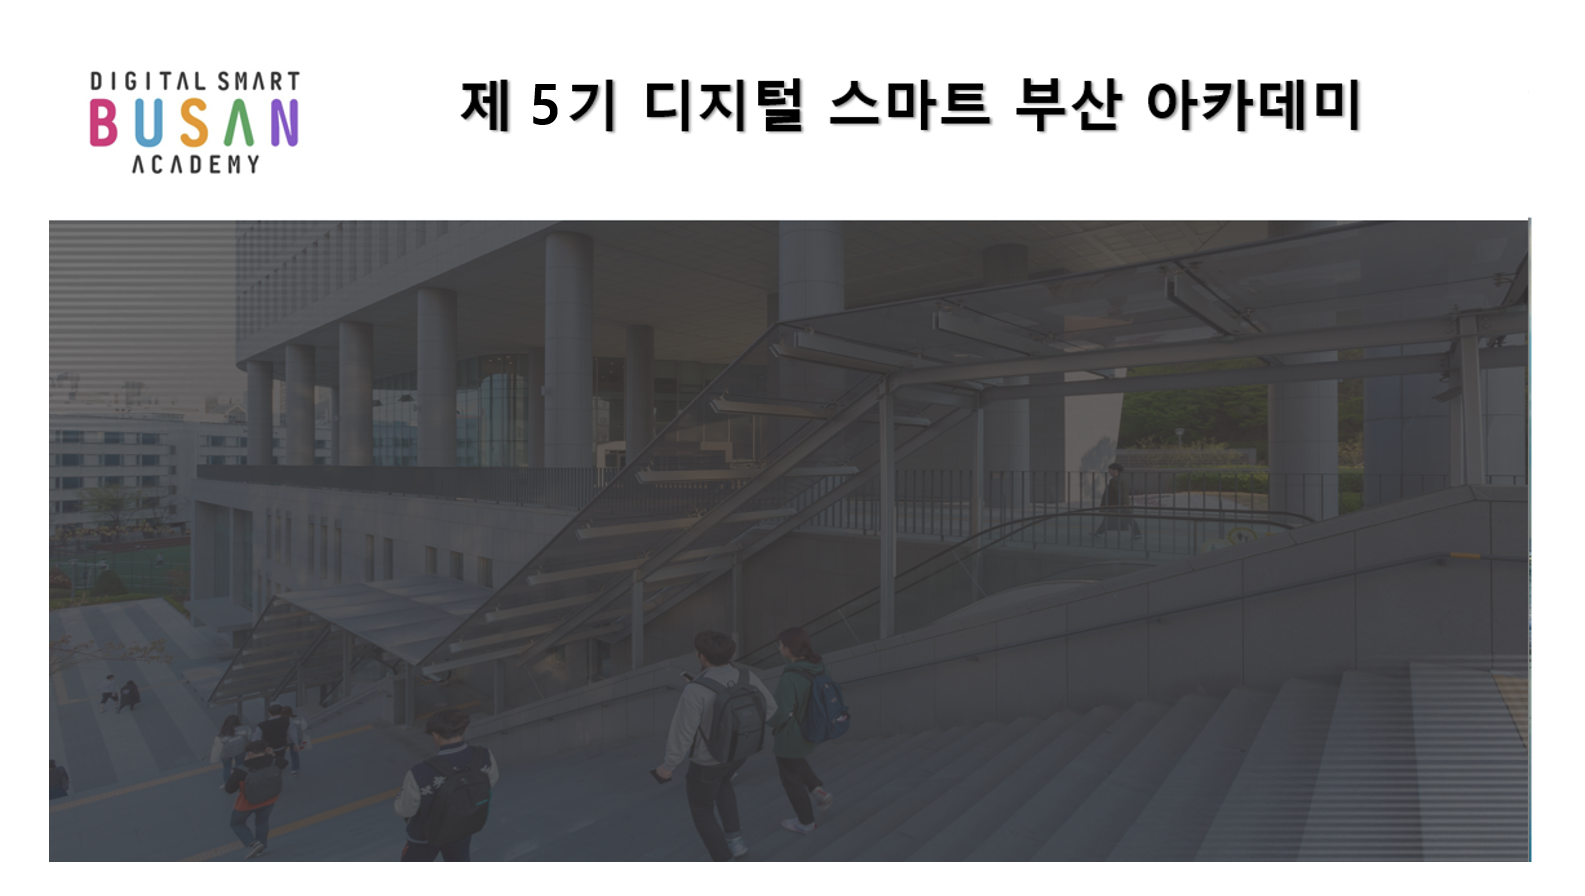

# **6장 차원 축소**

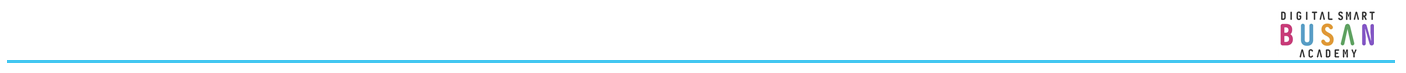

## 6.1 차원 축소(Dimension Reduction) 개요
* 대표적인 차원 축소 알고리즘 PCA(Principal Component Analysis), LDA(Linear Discriminant Analysis), SVD(Singular Value Decomposition), NMF(Non-Negative Matrix Factorization)
* 일반적으로 차원 축소는 피처 선택(feature selection)과 피처 추출(feature extraction)
  * 피처 선택(feature selection): 특정 피처에 종속성이 강한 불필요한 피처는제거하고 데이터의 특징을 잘 나타내는 주요 피처만 선택하는 것
  * 피처 추출(feature extraction): 기존 피처를 단순 압축이 아닌, 피처를 함축적으로 더 잘 설명할 수 있는 또 다른 공간으로 매핑해 추출하는 것 --    > 잠재적인 요소(Latent Factor)를 추출하는 것을 의미
  * PCA, SVD, NMF는 잠재적인 요소를 찾는 대표적인 차원 축소 알고리즘
* 차원 축소 알고리즘은 문서 내 단어들의 구성에서 숨겨져 있는 시맨틱(Semantic)의미나 토픽(Topic)을 잠재 요소로 간주함 --> SVD와  NMF가 시맨틱 토픽 모델링을 위한 기반 알고리즘으로 사용

* **[참고] 차원축소의 목적(필요성)**
* 기계학습 측면에서는 차원 축소가 차원의 저주 (Curse of Dimensionality; 차원이 증가하면 그것을 표현하기 위한 데이터 양이 기하급수적으로 증가)를 피할 수 있다.
* 과적합 (Overfitting) 을 방지하는데에 효과적
  * 과적합이 발생하면, 분석 모형의 신뢰도를 떨어뜨릴 수 있다.
* 정보 손실의 최소화하여 가능한 많은 정보를 포함하고 데이터 설명에 중요한 변수만 선택
  * 리소스를 감소시켜 모델의 성능을 향상시킬 수 있다.

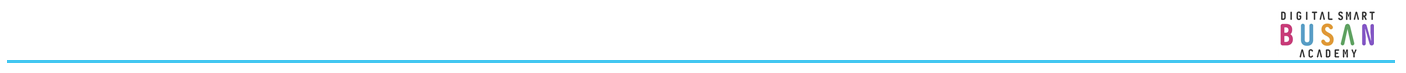

## 6.2 PCA(Principal Component Analysis)
**PCA 개요**
* PCA는 여러 변수 간에 존재하는 상관관계를 이용해 이를 대표하는 주성분(Principal Component)을 추출해 차원을 축소하는 기법
* PCA는 가장 높은 분산을 가지는 데이터의 축을 찾아 이 축으로 차원을 축소하는 데, 이것이 PCA의 주성분(분산이 데이터의 특성을 가장 잘 나타내는 것으로 간주)
* 키와 몸무게 2개의 피처를 가지고 있는 데이터 세트
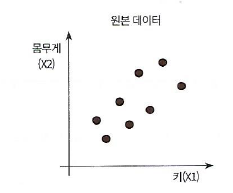


* 2개의 피처를 한 개의 주성분을 가진 데이터 세트로 차원 축소
  * 데이터 변동성이 가장 큰 방향으로 축을 생성하고 새롭게 생성된 축으로 데이터를 투영하는 방식

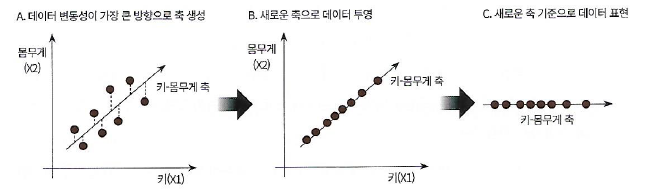

* PCA는 제일 먼저 가장 큰 데이터 변동성(Variance)을 기반으로 첫 번째 벡터 축을 생성하고, 두 번째 축은 이 벡터 축에 직각이 되는 벡터(직교 벡터)를 축으로 생성

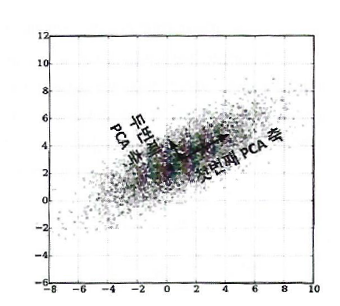



* PCA를 선형대수 관점에서 해석; 입력 데이터의 공분산 행렬(Covariance Matrix)을 고윳값 분해하고, 고유벡터(PCA 주성분 벡터)에 입력 데이터를 선형 변환하는 것
  * 공분산 행렬은 정방행렬(Square Matrix; 열과 행이 같은 행렬)이며 대칭행렬(Symmetric Matrix; 정방행렬 중에서 대각 원소를 중심으로 원소 값이 대칭되는 행렬, $A^T=A$)
  * 대칭행렬은 항상 고유벡터를 직교행렬(orthogonal matrix)로, 고윳값을 정방 행렬로 대각화할 수 있다.
  * 입력 데이터의 공분산 행렬 $C$는 공분산 행렬의 특성으로 다음과 같이 분해할 수 있다.

  $$C=P \sum P^T$$

  여기서 $P$는 $n\times n$의 직교행렬, $\sum$는 $n\times n$의 정방행렬, $P^T$는 $P$의 전치행렬

  $$C=\begin{bmatrix}e_1&\cdots&e_n\\ \end{bmatrix}\begin{bmatrix}\lambda_1&\cdots&0\\ \cdots&\cdots&wcdots\\ 0&\cdots&\lambda_n\\ \end{bmatrix}\begin{bmatrix}e_1^t\\ \cdots\\ e_n^t\\ \end{bmatrix}$$

* 공분산 $C$는 고유벡터 직교행렬 \* 고윳값 정방행렬 \* 고윳값 직교 행렬의 전치 행렬로 분해
  * $e_i$는 $i$번째 고유벡터, $\lambda_i$는 $i$번째 고유벡터의 크기를 의미
  * $e_1$는 가장 분산이 큰 방향를 가진 고유벡터
  * $e_2$는 $e_1$에 수직이면서 다음으로 가장 분산이 큰 방향을 가진 고유벡터

* PCA는 다음과 같은 스텝으로 수행
1. 입력 데이터 세트의 공분산 행렬을 생성
2. 공분산 행렬의 고유벡터와 고윳값을 계산
3. 고유값이 가장 큰 순으로 K개(PCA변환 차수)만큼 고유벡터를 추출
4. 고유값이 가장 큰 순으로 추출된 고유벡터를 이용해 새롭게 입력 데이터를 변환

* PCA는 많은 속성으로 구성된 원본 데이터를 그 핵심을 구성하는 데이터로 압축

In [1]:
# 사이킷런의 붓꽃 데이터를 load_iris()를 이용해 로딩한 뒤 시각화의 편의를 위해 DataFrame으로 변환
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


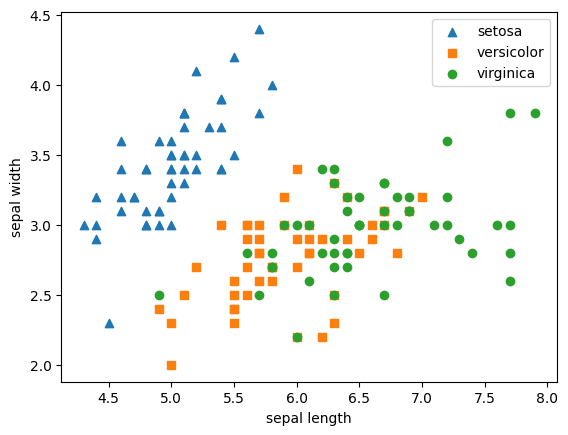

In [2]:
# 각 품종에 따라 원본 붓꽃 데이터 세트가 어떻게 분포돼 있는지 2차원으로 시각화
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

* Setosa 품종의 경우 보통 sepal width가 3.0보다 크고, sepal length가 6.0 이하인 곳에 일정하게 분포
* Versicolor와 Virginica의 경우 sepal width와 sepal length 조건만으로 분류가 어려움

In [3]:
# 붓꽃 데이터 세트에 바로 PCA 적용하기 전에 개별 속성을 함께 스케일링

from sklearn.preprocessing import StandardScaler

# Target 값을 제외한 모든 속성 값을 StandardScaler를 이용하여 표준 정규 분포를 가지는 값들로 변환
iris_scaled = StandardScaler().fit_transform(irisDF.iloc[:, :-1])

In [4]:
# 스케일링이 적용된 데이터 세트에 PCA를 적용해 4차원의 붓꽃 데이터를 2차원 PCA 데이터로 변환

from sklearn.decomposition import PCA

pca = PCA(n_components=2) #=> n_components는 PCA로 변환할 차원의 수를 의미

#fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)
print(iris_pca.shape)

(150, 2)


In [5]:
# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca, columns=pca_columns)
irisDF_pca['target']=iris.target
irisDF_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


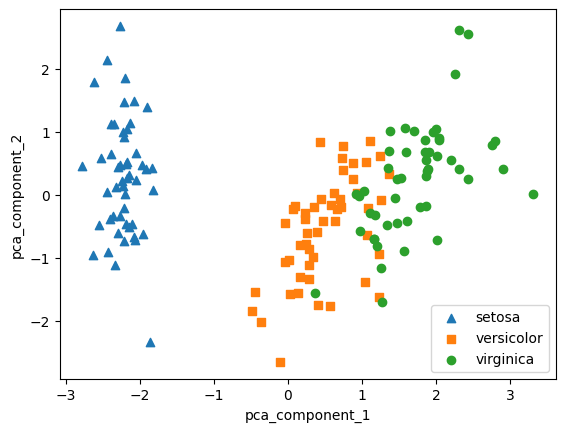

In [6]:
# 2개의 속성으로 PCA 변환된 데이터 세트를 2차원상에서 시각화
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행.
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

* PCA 변환 후에도 pca_component_1 축을 기반으로 Setosa 품종은 명확하게 구분이 가능
* Versicolor와 Virginica의 경우 pca_component_1 축을 기반으로 서로 겹치는 부분이 일부 존재하지만 비교적 잘 구분되었음

In [7]:
# PCA 객체의 explained_variance_ratio_ 속성은 전체 변동성에서 개별 PCA 컴포넌트별로 차지하는 변동성 비율을 제공

print(pca.explained_variance_ratio_)

[0.72962445 0.22850762]


* 첫 번째 PCA 변환 요소인 pca_component_1이 전체 변동성의 약 72.9%를 차지,  두 번째 PCA 변환 요소인 pca_component_2이 전체 변동성의 약 22.8%를 차지
* PCA를 2개 요소만 변환해도 원본 데이터의 변동성을 95% 설명

In [8]:
# 원본 붓꽃 데이터 세트와 PCA로 변환된 데이터 세트에 각각 분류를 적용한 후 결과 비교
# 원본 붓꽃 데이터에 랜덤 포레스트(Random Forest)를 적용한 결과

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=156)
scores = cross_val_score(rcf, iris.data, iris.target,scoring='accuracy',cv=3)
print('원본 데이터 교차 검증 개별 정확도:',scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.96]
원본 데이터 평균 정확도: 0.96


In [9]:
# 기존 4차원 데이터를 2차원으로 PCA 변환한 데이터 세트에 랜덤 포레스트를 적용
pca_X = irisDF_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3 )
print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.88]
PCA 변환 데이터 평균 정확도: 0.88


* 원본 데이터 세트 대비 예측 정확도는 PCA 변환 차원 개수에 따라 예측 성능은 약 8% 떨어짐
 * 4개의 속성이 2개로 감소(50% 감소)한 것을 고려한다면 PCA 변환 후에도 원본 데이터의 특성을 상당부분 유지하고 있음

* 신용카드 고객(Credit Card Clients) 데이터 세트 PCA 변환
  *  https://archive.ics.uci.edu/dataset/350/default+of+credit+card+clients

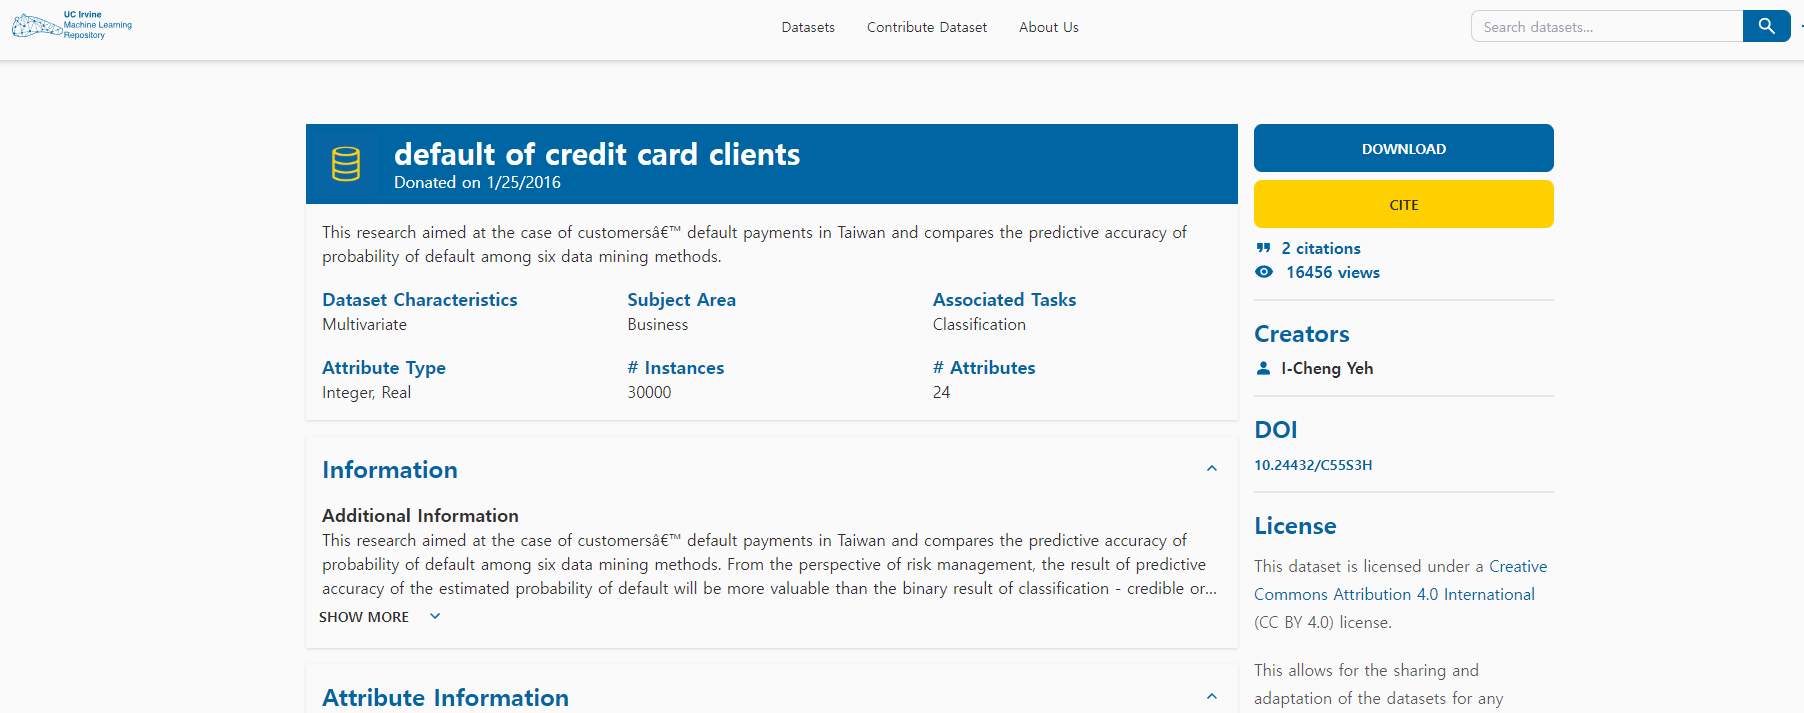  

* 신용카드 데이터 세트는 30,000개의 레코드와 24개의 속성
  * 'default payment next month' 속성이 Target값으로 '다음달 연체 여부'를 의미하며 '연체'일 경우 1, '정상납부'가 0

In [10]:
import pandas as pd

df = pd.read_excel('credit_card.xls', sheet_name='Data')
print(df.shape)
df.head(3)

(30001, 25)


,Unnamed: 0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
1,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
2,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1


In [11]:
# header로 의미없는 첫행 제거, iloc로 기존 id 제거
import pandas as pd

df = pd.read_excel('credit_card.xls', header=1, sheet_name='Data').iloc[0:,1:]
print(df.shape)
df.head(3)

(30000, 24)


,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0


In [12]:
# 'default payment next month' 칼럼명 --> 'default'로 변경
#  'default' 칼럼을 제외한 피처 데이터는 별도의 DataFrame으로 만듬

df.rename(columns={'PAY_0':'PAY_1','default payment next month':'default'}, inplace=True)
y_target = df['default']
X_features = df.drop('default', axis=1)

In [13]:
X_features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 23 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   LIMIT_BAL  30000 non-null  int64
 1   SEX        30000 non-null  int64
 2   EDUCATION  30000 non-null  int64
 3   MARRIAGE   30000 non-null  int64
 4   AGE        30000 non-null  int64
 5   PAY_1      30000 non-null  int64
 6   PAY_2      30000 non-null  int64
 7   PAY_3      30000 non-null  int64
 8   PAY_4      30000 non-null  int64
 9   PAY_5      30000 non-null  int64
 10  PAY_6      30000 non-null  int64
 11  BILL_AMT1  30000 non-null  int64
 12  BILL_AMT2  30000 non-null  int64
 13  BILL_AMT3  30000 non-null  int64
 14  BILL_AMT4  30000 non-null  int64
 15  BILL_AMT5  30000 non-null  int64
 16  BILL_AMT6  30000 non-null  int64
 17  PAY_AMT1   30000 non-null  int64
 18  PAY_AMT2   30000 non-null  int64
 19  PAY_AMT3   30000 non-null  int64
 20  PAY_AMT4   30000 non-null  int64
 21  PAY_AMT5   3

<Axes: >

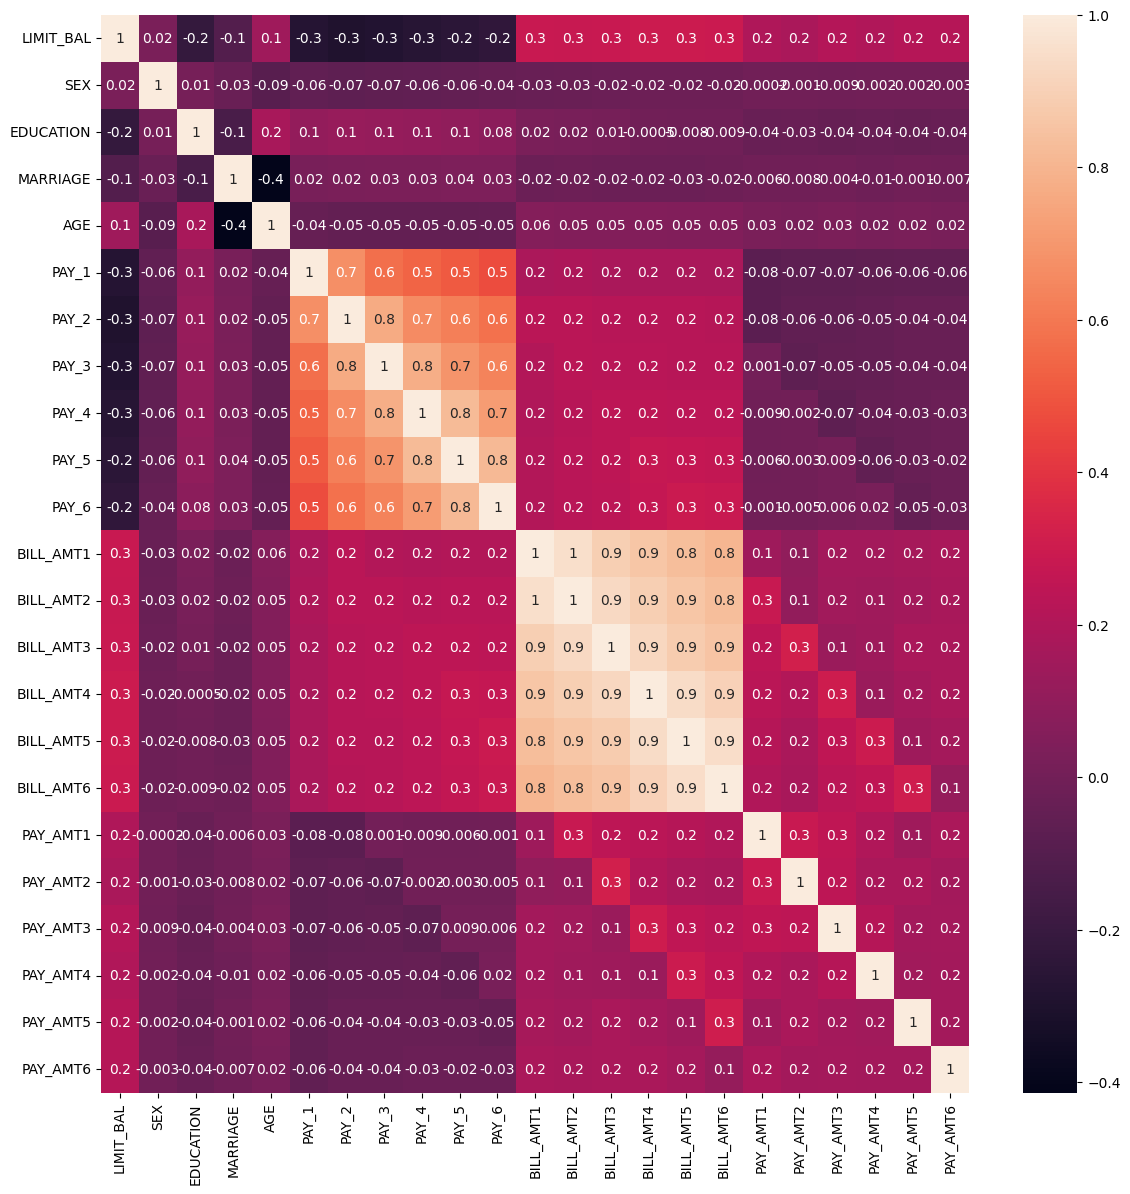

In [18]:
# 23개의 속성끼리 상관도를 heatmap으로 시각화

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

corr = X_features.corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr, annot=True, fmt='.1g') #annot=True:각 셀에 상관계수 값을 표시, fmt='.1g':소수점 아래 한 자리까지 유효숫자를 표시


* BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성끼리 상관도가 대부분 0.9 이상으로 매우 높음
* PAY_1 ~ PAY_6까지 속성 역시 상관도가 높음
* 이렇게 높은 상관도를 가진 속성들은 소수의 PCA만으로도 자연스럽게 이 속성들의 변동성을 수용할 수 있다.

In [19]:
# BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성을 2개의 컴포넌트로 PCA 변환한 뒤
# 개별 컴포넌트의 변동성을 explained_variance_ratio_ 속성으로 알아봄

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

#BILL_AMT1 ~ BILL_AMT6 까지 6개의 속성명 생성
cols_bill = ['BILL_AMT'+str(i) for i in range(1,7)]
print('대상 속성명:',cols_bill)

# 2개의 PCA 속성을 가진 PCA 객체 생성하고, explained_variance_ratio_ 계산 위해 fit( ) 호출
scaler = StandardScaler()
df_cols_scaled = scaler.fit_transform(X_features[cols_bill])
X_features.loc[:, cols_bill] = df_cols_scaled
pca = PCA(n_components=2)
pca.fit(df_cols_scaled)
print('PCA Component별 변동성:', pca.explained_variance_ratio_)

대상 속성명: ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']
PCA Component별 변동성: [0.90555253 0.0509867 ]


* 단 2개의 PCA 컴포넌트만으로도 6개 속성의 변동성을 약 95% 이상 설명
  * 첫 번째 PCA축으로 90%의 변동성을 수용할 정도로 6개 속성의 상관도가 매우 높음

In [20]:
# 원본 데이터 세트와 6개의 컴포넌트 PCA 변환한 데이터 세트의 분류 예측 결과 비교

import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rcf = RandomForestClassifier(n_estimators=300, random_state=156)
scores = cross_val_score(rcf, X_features, y_target, scoring='accuracy', cv=3 )

print('CV=3 인 경우의 개별 Fold세트별 정확도:',scores)
print('평균 정확도:{0:.4f}'.format(np.mean(scores)))


CV=3 인 경우의 개별 Fold세트별 정확도: [0.8083 0.8196 0.8232]
평균 정확도:0.8170


* 3개의 교차 검증 세트에서 평균 예측 정확도는 약 81.70%

In [21]:
# 6개의 컴포넌트로 PCA 변환한 데이터 세트 분류 예측

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 6개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행.
pca = PCA(n_components=6)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7913 0.7973 0.8029]
PCA 변환 데이터 셋 평균 정확도:0.7972


* 전체 23개 속성의 ㅣ약 1/4 수준인 6개의 PCA 컴포넌트만으로도 원본 데이터를 기반으로 한 분류 예측 결과보다 약 1~2%의 예측 성능 저하만 발생

In [22]:
#[참고] 11개의 컴포넌트로 PCA 변환한 데이터 세트 분류 예측

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 11개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행.
pca = PCA(n_components=11)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.795  0.8033 0.8047]
PCA 변환 데이터 셋 평균 정확도:0.8010


In [23]:
#[참고] 3개의 컴포넌트로 PCA 변환한 데이터 세트 분류 예측

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 3개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행.
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7844 0.791  0.7964]
PCA 변환 데이터 셋 평균 정확도:0.7906


In [24]:
#[참고] 2개의 컴포넌트로 PCA 변환한 데이터 세트 분류 예측

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 원본 데이터셋에 먼저 StandardScaler적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(X_features)

# 2개의 Component를 가진 PCA 변환을 수행하고 cross_val_score( )로 분류 예측 수행.
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)
scores_pca = cross_val_score(rcf, df_pca, y_target, scoring='accuracy', cv=3)

print('CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도:',scores_pca)
print('PCA 변환 데이터 셋 평균 정확도:{0:.4f}'.format(np.mean(scores_pca)))

CV=3 인 경우의 PCA 변환된 개별 Fold세트별 정확도: [0.7699 0.7827 0.7878]
PCA 변환 데이터 셋 평균 정확도:0.7801


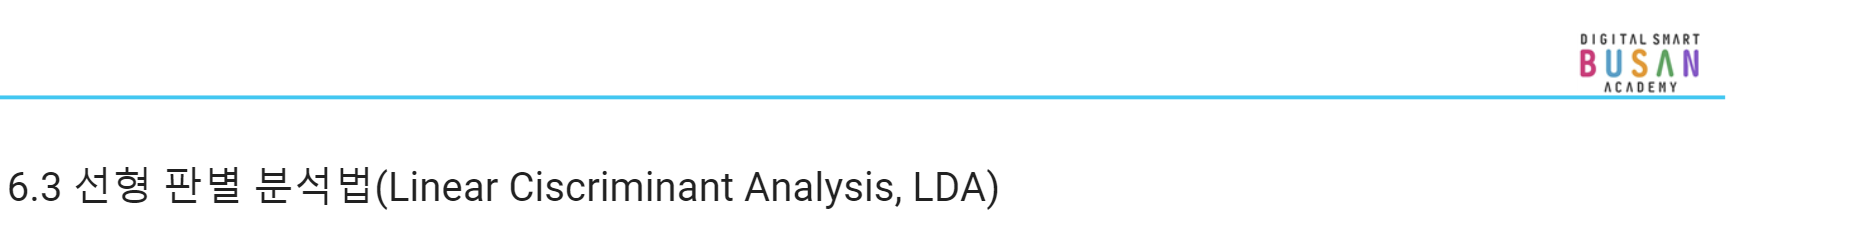

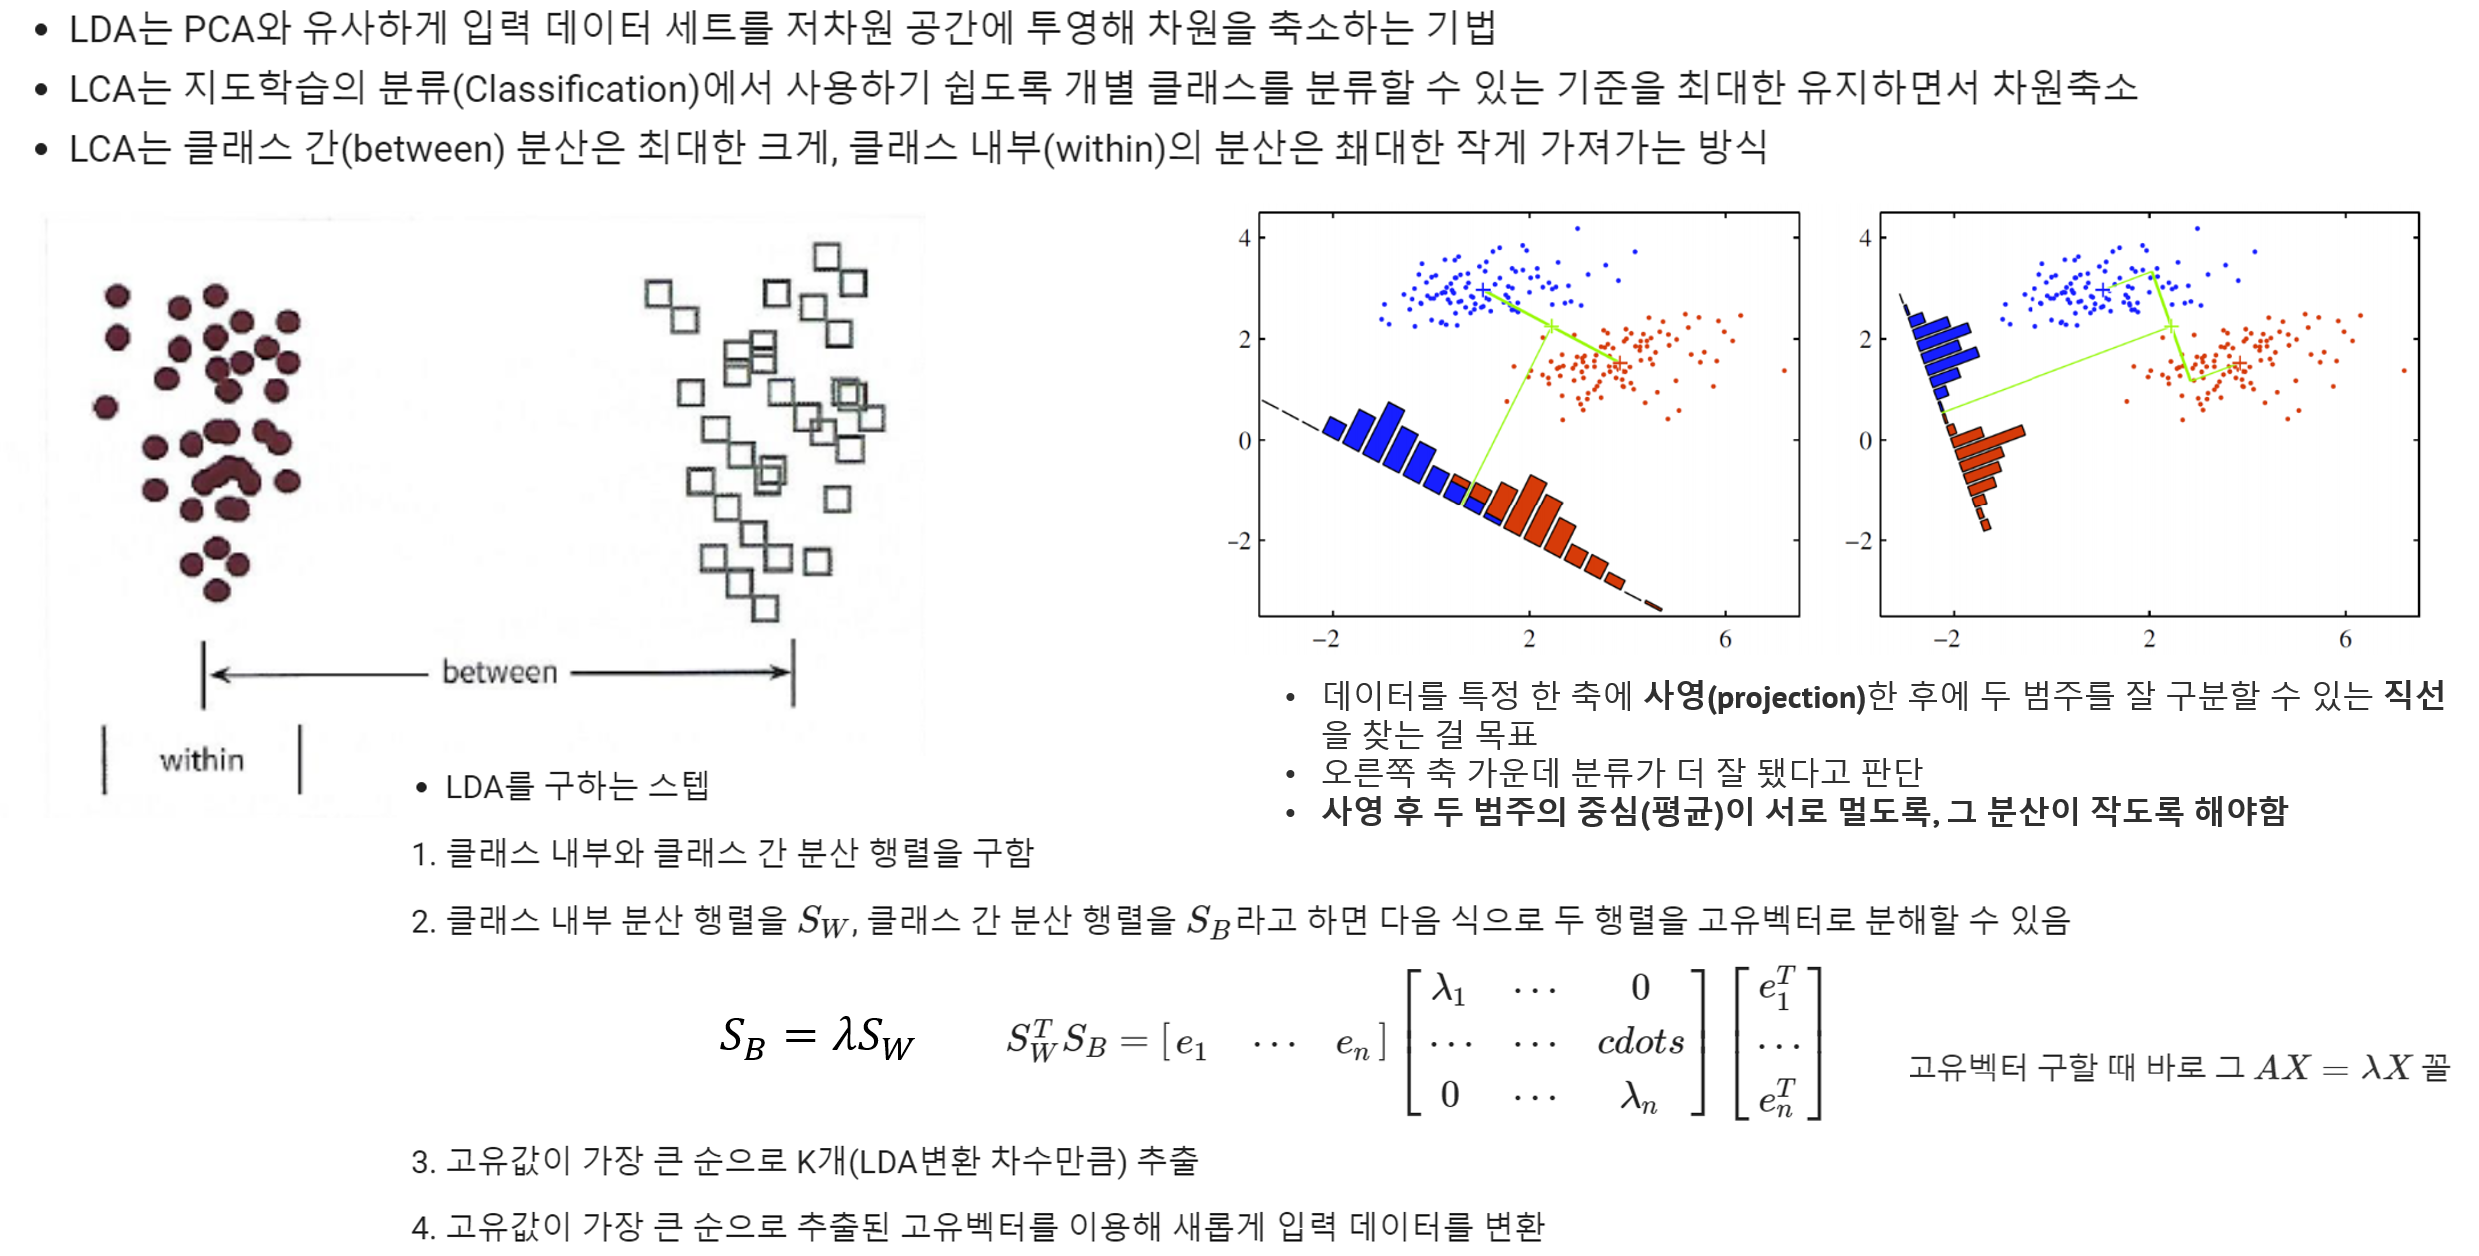

### 붓꽃 데이터 셋에 LDA 적용하기

In [25]:
# 붓꽃 데이터 세트를 로드하고 표준 정규 분포로 스케일링

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris

iris = load_iris()
iris_scaled = StandardScaler().fit_transform(iris.data)

⭐LDA는 지도학습 ! => 클래스의 결정값이 변환 시에 필요함

In [26]:
# 2개의 컴포넌트로 붓꽃 데이터를 LDA 변환(PCA와 다르게 비지도학습이 아닌 지도학습)

lda = LinearDiscriminantAnalysis(n_components=2)
lda.fit(iris_scaled, iris.target)
iris_lda = lda.transform(iris_scaled)
print(iris_lda.shape)

(150, 2)


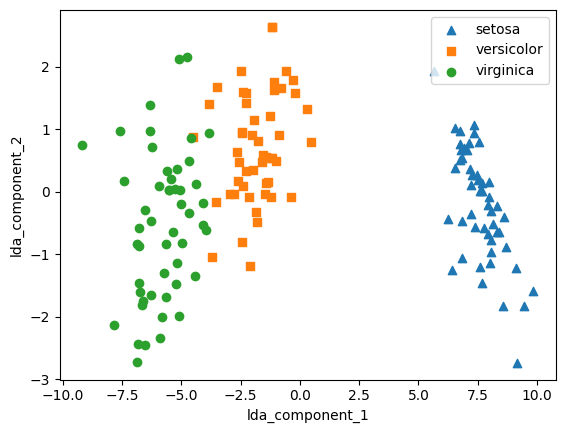

In [27]:
# LDA 변환된 입력 데이터 값을 2차원 평면에 품종별로 표현

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

lda_columns=['lda_component_1','lda_component_2']
irisDF_lda = pd.DataFrame(iris_lda,columns=lda_columns)
irisDF_lda['target']=iris.target

#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_1']
    y_axis_data = irisDF_lda[irisDF_lda['target']==i]['lda_component_2']

    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend(loc='upper right')
plt.xlabel('lda_component_1')
plt.ylabel('lda_component_2')
plt.show()

* LDA로 변환된 붓꽃 데이터 세트를 시각화하면 PCA로 변환된 데이터와 좌우 대칭 형태로 많이 닮아있음

In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# 데이터 준비 (예시)
# ... (iris 데이터 로드 등)

# 데이터 표준화
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris.data)

# LDA 변환
lda = LinearDiscriminantAnalysis(n_components=2)
iris_lda = lda.fit_transform(iris_scaled, iris.target)

# 로지스틱 회귀 모델 학습 및 교차 검증
model = LogisticRegression()
scores = cross_val_score(model, iris_lda, iris.target, cv=3)

# 결과 출력
print(scores)
print("평균 정확도:", scores.mean())

[1.   0.98 0.96]
평균 정확도: 0.98


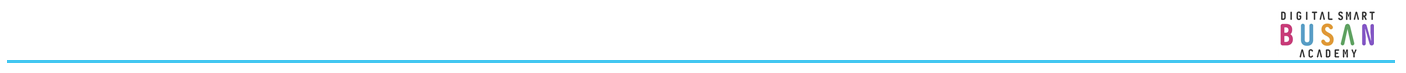

## 6-4 특이값 분해(Singlar Vector Decomposition, SVD)
### SVD 개요
* SVD 역시 PCA와 유사한 행렬 분해 기법을 이용
  * PCA의 경우 정방행렬 만을 고유벡터로 분해, SVC는 정방행렬뿐만 아니라 행과 열의 크기가 다른 행렬에도 적용
  * 일반적으로 SVD는 mXn크기의 행렬 A를 다음과 같이 분해하는 것을 의미
    * 여기서 행렬$U$와 $V$에 속한 벡터는 특이 벡터(Singlar Vector)이며, 모든 특이 벡터는 서로 직교하는 성질을 가짐
    * $\sum$는 대각행렬이며, 행렬의 대각에 위치한 값(행렬 A의 특이값)만 0이 아니고 나머지 위치의 값은 모두 0.

$$A=U \sum V^T$$
   
* SVD는 A의 차원이 mXn일 때 $U$의 차원이 mXm, $\sum$차원이 mXn, $V^T$의 차원이 nXn으로 분해

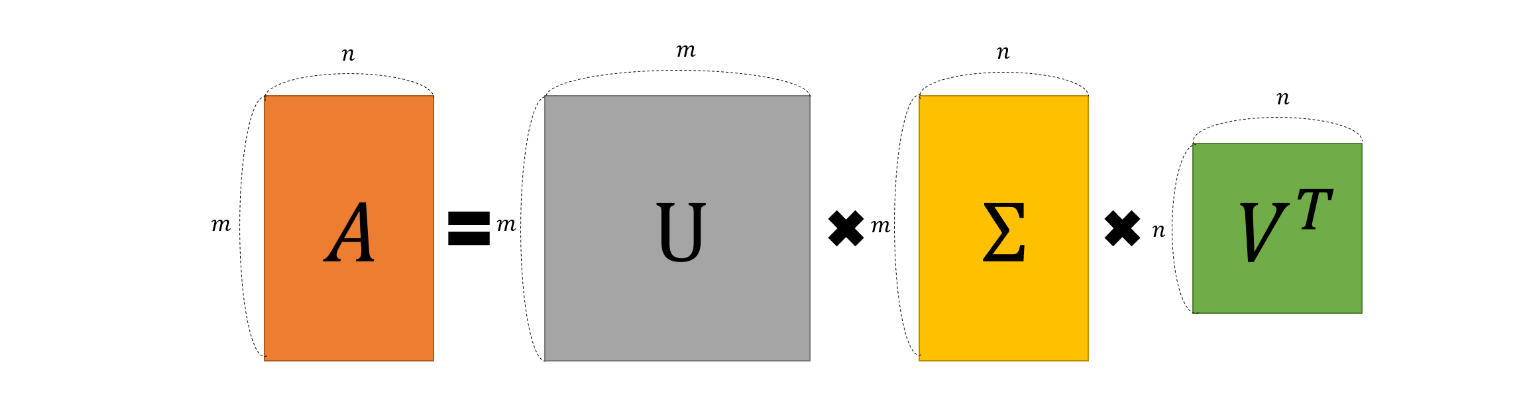

* 일반적으로는 $\sum$의 비대각인 부분과 대각원소 중에 특이값이 0인 부분도 모두 제거하고 제거된 $\sum$($pXp$ 차원)에 대응되는 $U(mXp 차원)$, $V&T(pXn 차원)$으로 차원을 줄인 형태로 SVD 적용(Truncated SVD)

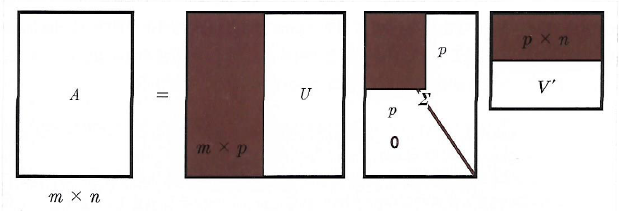



In [29]:
# numpy의 svd 모듈(numpy.linalg.svd) import
import numpy as np
from numpy.linalg import svd

# 4X4 Random 행렬 a 생성
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [30]:
# 생성된 a 행렬에 SVD를 적용해 U, Sigma, Vt를 도출
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]
Sigma Value:
 [3.423 2.023 0.463 0.079]
V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


* U 행렬이 4X4, Vt 행렬이 4X4로 반환됐고, Sigma의 경우는 1차원 행렬인 (4,)로 반환

In [31]:
# 분해된 U, Sigma, Vt를 이용해 다시 원본 행렬로 복원되는지 확인
# Sima를 다시 0 을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(np.round(a_, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


* U, Sigma, Vt를 이용해 a_는 원본 행렬a와 동일하게 복원

In [34]:
# 데이터 세트가 로우(row) 간의 의존성이 있을 경우 어떻게 Sigma 값이 변하고, 이에 따른 차원 축소
a[2] = a[0] + a[1]
a[3] = a[0]
print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [35]:
# 다시 SVD를 수행하여 Sigma 값 확인
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('U matrix:\n',np.round(U, 3))
print('Sigma Value:\n',np.round(Sigma, 3))
print('V transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)
U matrix:
 [[ 0.246  0.583  0.76  -0.15 ]
 [-0.774 -0.017  0.365  0.516]
 [-0.529  0.566 -0.365 -0.516]
 [ 0.246  0.583 -0.395  0.666]]
Sigma Value:
 [2.663 0.807 0.    0.   ]
V transpose matrix:
 [[ 0.164 -0.575 -0.782 -0.173]
 [-0.68   0.194 -0.132 -0.695]
 [-0.389 -0.784  0.479  0.07 ]
 [-0.6    0.13  -0.376  0.694]]


* 이전과 차원은 같지만 Sigma 값 중 2개가 0으로 변함(행렬의 랭크(rank)가 2)

In [36]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(np.round(a_, 3))

(4, 2) (2, 2) (2, 4)
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


* Truncated SVD 를 이용한 행렬 분해

In [37]:
# Truncated SVD로 분해된 행렬의 내적을 계산하여 다시 복원된 데이터와 원본 데이터를 비교
# Truncated SVD 연산은 사이파이 모듈에서만 지원됨

import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt 의 차원 확인
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행.
num_components = 4
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 4) (4,) (4, 6)

Truncated SVD Sigma값 행렬: [0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.19222941 0.21792946 0.15951023 0.14084013 0.81641405 0.42533093]
 [0.44874275 0.72204422 0.34594106 0.99148577 0.96866325 0.4754868 ]
 [0.12656662 0.88860729 0.30625735 0.59517439 0.28036734 0.93961948]
 [0.23989012 0.51026588 0.39697353 0.27308905 0.05971563 0.57156395]
 [0.83806144 0.78847467 0.93868685 0.72673231 

* 6X6 행렬을 SVD 분해하면 U, Sigma, Vt가 각각 (6,6), (6,),(6,6) 차원이지만 Truncated SVD의 n_components를 4로 설정해 U, Sigma, Vt를 (6,4), (4,),(4,6)로 각각 분해
* Truncated SVD로 분해된 행렬로 다시 복원할 경우 완벽하게 복원되지 않고 근사적으로 복원됨





### 사이킷런 TruncatedSVD 클래스를 이용한 변환
* 사이킷런 TruncatedSVD 클래스는 사이파이의 svds와 같이 Truncated SVD 연산을 수행해 원본 행렬을 분해한 U, Sigma, Vt 행렬을 반환하지 않음
* 사이킷런 TruncatedSVD 클래스는 PCA 클래스와 유사하게 fit()와 transform()을 호출해 원본 데이터를 몇 개의 주요 컴포넌트로 차원을 축소

Text(0, 0.5, 'TruncatedSVD Component 2')

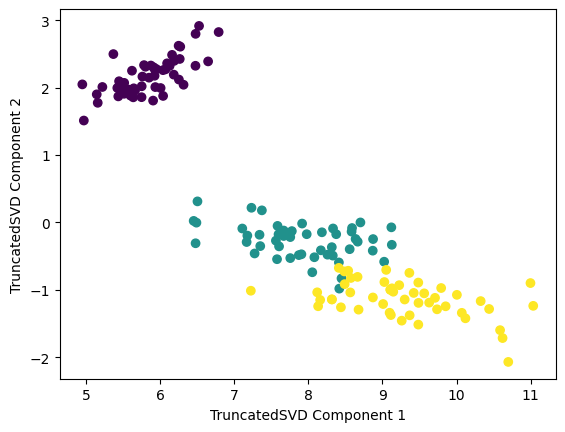

In [38]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

* TruncatedSVD로 변환 역시 PCA와 유사하게 변환 후에 품종별로 어느 정도 클러스터링이 가능할 정도로 각 변환 속성으로 뛰어난 고유성을 가지고 있음

Text(0.5, 1.0, 'PCA Transformed')

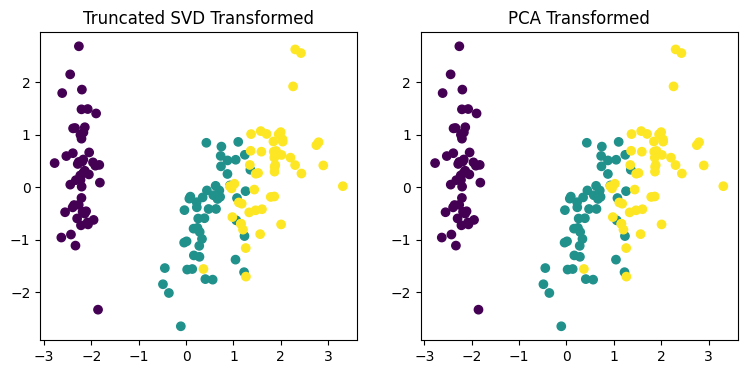

In [39]:
# 사이킷런의 TruncatedSVD와 PCA 클래스 구현(SVD를 이용해 행렬을 분해)
from sklearn.preprocessing import StandardScaler

# iris 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현
fig, (ax1, ax2) = plt.subplots(figsize=(9,4), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target)
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target)
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

* TruncatedSVD와 PCA 변환 행렬 값과 속성별 컴포넌트 비율값을 실제로 서로 비교해 보면 거의 같음
* 두 개의 변환 행렬 값과 원복 속성별 컴포넌트 비율값을 실제로 서로 비교해보면 거의 같음을 알 수 있다

In [40]:
print((iris_pca - iris_tsvd).mean())
print((pca.components_ - tsvd.components_).mean())

2.3364990497931616e-15
2.0816681711721685e-17


* TruncatedSVD와 PCA 변환 서로 동일함을 확인(모두 0에 가까운 값)
* PCA는 밀집 행렬(Dense Matrix)에 대한 변환만 가능. SVD는 희소행렬(Spaarse Matrix)에 대한 변환도 가능

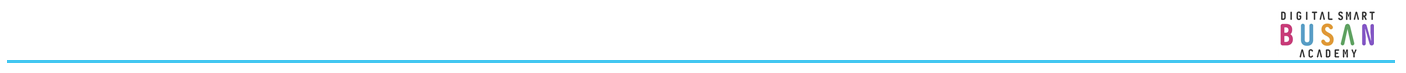

## 6-5 NMF(Non-Negative Matrix Factorization)
### NMF 개요
* NMF는 Truncated SVD와 같이 낮은 랭크를 통한 행렬 근사(Low-Rank Approximation) 방식의 변형
* NMF는 원본 행렬 내의 모든 원소 값이 모두 양수(0 이상)라는 게 보장되면 다음과 같이 4X6 원본 행렬 V는 좀 더 간단하게 두 개의 기반 양수 행렬(42 행렬 W와 2X6 행렬 H)로 분해될 수 있는 기법

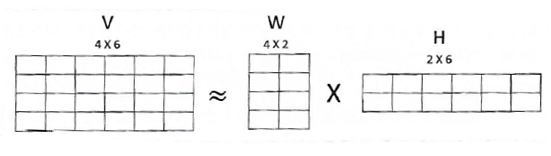

* 분해 행렬 W는 원본 행에 대해서 잠재 요소의 값이 얼마나 되는 지에 대응,
  분해 행렬 H는 잠재 요소가 원본 열(즉, 원본 속성)로 어떻게 구성됐는지를 나타내는 행렬


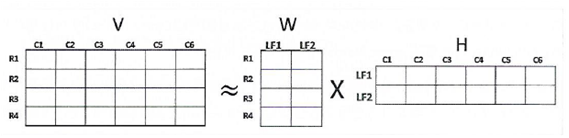



* NMF는 SVD와 유사하게 차원 축소를 통한 잠재 요소 도출로 이미지 변환 및 압축, 텍스트의 토픽  도출 등의 영역에 사용

/usr/local/lib/python3.10/dist-packages/sklearn/decomposition/_nmf.py:1665: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Text(0, 0.5, 'NMF Component 2')

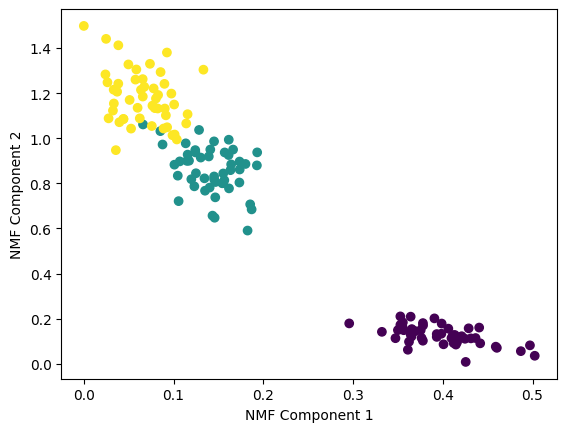

In [41]:
# 사이킷런에서 NMF는 NMF 클래스를 이용해 지원
# 붓꽃 데이터를 NMF를 이용해 2개의 컴포넌트로 변환하고 시각화

from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)
nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)
plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c= iris.target)
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')


* NMF는 SVD와 유사하게 이미지 압축을 통한 패턴 인식, 텍스트의 토픽 모델링 기법, 문서 유사도 및 클러스터링에 잘 사용. 영화 추천과 같은 추천 영역에 활발하게 적용


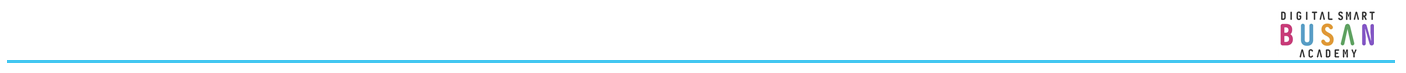